In [67]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

import dill

In [68]:
dill.load_session("model.db")

In [69]:
# Read the image
image = cv2.imread(input("Enter the path to the image: "))
image = cv2.bitwise_not(image)

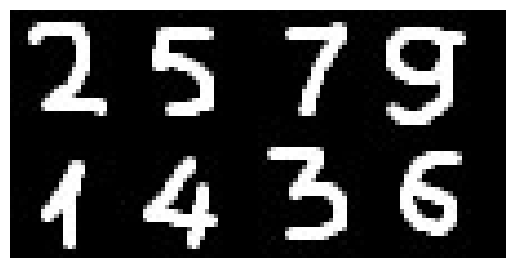

In [70]:
# Preprocess the image
image = cv2.resize(image, (28 * 4, 28 * 2))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

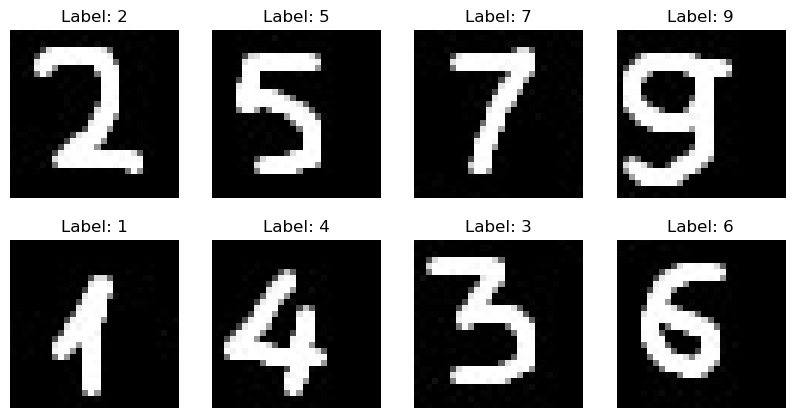

In [71]:
# Split the image into 8 parts
divisions = np.array(list(np.hsplit(i, 4) for i in np.vsplit(image, 2)))

digits = divisions.reshape(8, 28, 28)
labels = [2, 5, 7, 9, 1, 4, 3, 6]

# Display the image
fig, axs = plt.subplots(2, 4, figsize=(10, 5))
for i, ax in enumerate(axs.flat):
    ax.imshow(digits[i], cmap="gray")
    ax.set_title(f"Label: {labels[i]}")
    ax.axis("off")

plt.show()

In [72]:
digits = digits.reshape(8, 1, 28, 28)
digits = digits.astype(np.float32) / 255

In [73]:
pred = model.predict(digits)

Predicting: 100%|██████████| 8/8 [00:00<00:00, 203.89it/s]


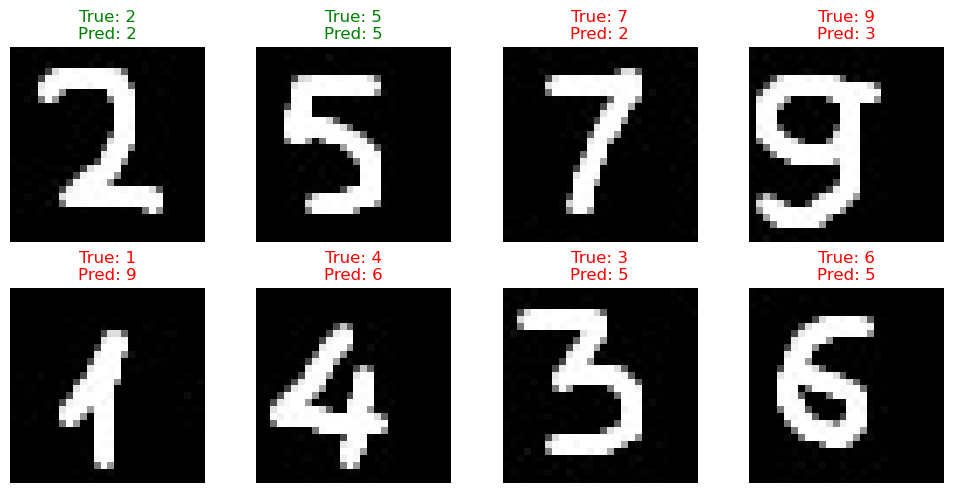

In [74]:
fig, ax = plt.subplots(2, 4, figsize=(10, 5))

for i in range(len(digits)):
    ax[i // 4, i % 4].imshow(digits[i].reshape(28, 28), cmap="gray")
    ax[i // 4, i % 4].set_title(
        f"True: {labels[i]}\nPred: {np.argmax(pred[i])}",
        color="green" if labels[i] == np.argmax(pred[i]) else "red",
    )
    ax[i // 4, i % 4].axis("off")


plt.tight_layout()
plt.show()